In [1]:
import pandas as pd

from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor
)

from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('../data/felicidad_corrupt.csv')
df.sample(5)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
52,Algeria,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
158,D,159,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
166,L,167,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
92,Somalia,93,5.151,5.242484,5.059516,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485


In [10]:
X = df.drop(['country', 'score'], axis= 1)
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

estimadores = {
    'SVR' : SVR(gamma = 'auto', C = 1.0, epsilon= 0.1),
    'RANSAC' : RANSACRegressor(),
    'HUBER': HuberRegressor(epsilon=1.35)
}

for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    
    print("="*64)
    print(name)
    print(f"MSE: , {mean_absolute_error(y_test, predictions):.20f}")

SVR
MSE: , 0.16195525663680329642
RANSAC
MSE: , 0.00000000027168540371
HUBER
MSE: , 0.00069019019625040810


/home/edwlearn/anaconda3/envs/scikit/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVR


/home/edwlearn/anaconda3/envs/scikit/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


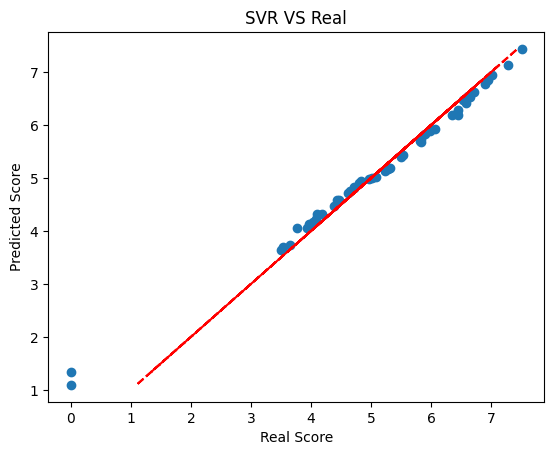

RANSAC


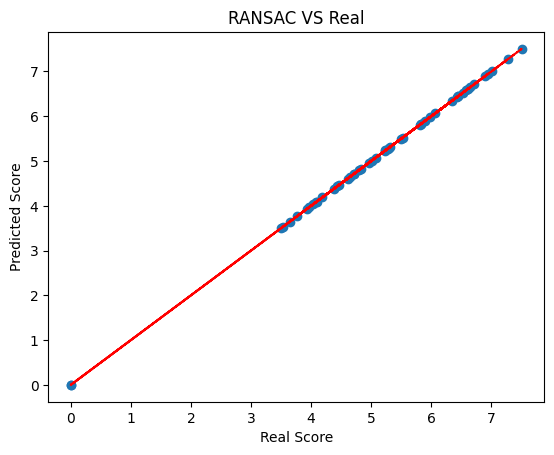

/home/edwlearn/anaconda3/envs/scikit/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HUBER


/home/edwlearn/anaconda3/envs/scikit/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


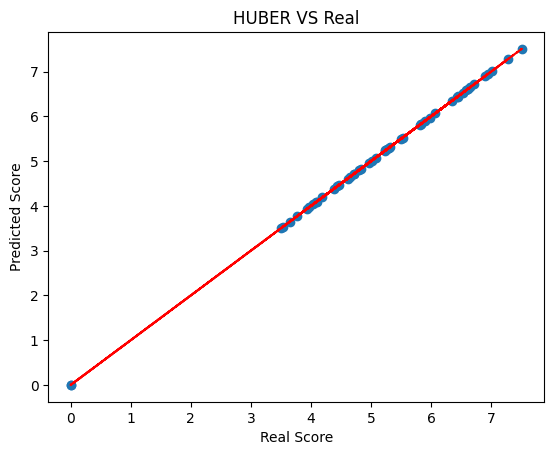

In [7]:
import matplotlib.pyplot as plt

for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    print(name)
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title(f'{name} VS Real')
    plt.scatter(y_test, predictions)
    plt.plot(predictions, predictions,'r--')
    plt.show()